In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In C:\Users\King\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\King\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\King\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\King\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\King\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle

In [4]:
wine=pd.read_csv('Redwine+Quality.csv')

In [5]:
wine.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
wine.head()

,Tartaric Acid,Grape Density,Citric Acid,Residual.sugar,Sodium chloride,Free.sulfur.dioxide,Bound.sulfur.dioxide,Alcohol Density,PH Levels,Potassium chloride,Alcohol Content
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [7]:
wine.shape

(1599, 11)

In [11]:
X_std = StandardScaler().fit_transform(wine)

In [13]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00062578 -0.25629118  0.67212377  0.11484855  0.09376383 -0.15389043
  -0.11325227  0.66846534 -0.68340559  0.18312019 -0.06170686]
 [-0.25629118  1.00062578 -0.55284143  0.00191908  0.06133613 -0.0105104
   0.07651786  0.02204002  0.23508431 -0.26115001 -0.20241462]
 [ 0.67212377 -0.55284143  1.00062578  0.14366701  0.20395046 -0.06101629
   0.03555526  0.36517555 -0.54224326  0.31296577  0.10997202]
 [ 0.11484855  0.00191908  0.14366701  1.00062578  0.05564433  0.18716605
   0.20315493  0.3555057  -0.08570602  0.00553058  0.04210177]
 [ 0.09376383  0.06133613  0.20395046  0.05564433  1.00062578  0.00556563
   0.04743013  0.20075788 -0.26519198  0.37149281 -0.22127893]
 [-0.15389043 -0.0105104  -0.06101629  0.18716605  0.00556563  1.00062578
   0.66808426 -0.02195956  0.07042154  0.0516899  -0.06945179]
 [-0.11325227  0.07651786  0.03555526  0.20315493  0.04743013  0.66808426
   1.00062578  0.07131408 -0.06653617  0.04297371 -0.20578264]
 [ 0.66846534  0.022040

In [14]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.48931422 -0.11050274 -0.12330157 -0.22961737 -0.08261366 -0.63969145
  -0.24952314  0.19402091 -0.17759545 -0.35022736  0.10147858]
 [-0.23858436  0.27493048 -0.44996253  0.07895978  0.21873452 -0.0023886
   0.36592473 -0.1291103  -0.07877531 -0.5337351   0.41144893]
 [ 0.46363166 -0.15179136  0.23824707 -0.07941826 -0.05857268  0.0709103
   0.62167708 -0.38144967 -0.37751558  0.10549701  0.06959338]
 [ 0.14610715  0.27208024  0.10128338 -0.37279256  0.73214429 -0.18402996
   0.09287208  0.00752295  0.29984469  0.29066341  0.04915555]
 [ 0.21224658  0.14805156 -0.09261383  0.66619476  0.2465009  -0.05306532
  -0.21767112  0.11133867 -0.35700936  0.37041337  0.30433857]
 [-0.03615752  0.51356681  0.42879287 -0.04353782 -0.15915198  0.05142086
   0.24848326  0.63540522 -0.2047805  -0.11659611 -0.01400021]
 [ 0.02357485  0.56948696  0.3224145  -0.03457712 -0.22246456 -0.0687016
  -0.37075027 -0.59211589  0.01903597 -0.09366237  0.13630755]
 [ 0.39535301  0.23357549 -0.3

### Question 1: Find out the eigenvector of the 5th component

In [15]:
eig_vecs[4] #fifth component

array([ 0.21224658,  0.14805156, -0.09261383,  0.66619476,  0.2465009 ,
       -0.05306532, -0.21767112,  0.11133867, -0.35700936,  0.37041337,
        0.30433857])

### Question 2: How much cumulative variance is explained by first four components?

In [16]:
tot = sum(eig_vals) # calculate the total value of eigen values
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)] # looping to calculate variance explained %
cum_var_exp = np.cumsum(var_exp) # using numpy cumsum to create an array of cumsum of var_exp
cum_var_exp

array([ 28.17393128,  45.68220118,  59.77805108,  70.80743772,
        79.52827474,  85.52471351,  90.83190641,  94.67696732,
        97.81007747,  99.4585608 , 100.        ])

### Question 3: As per given Scree Plot, how many principal components are preferred?

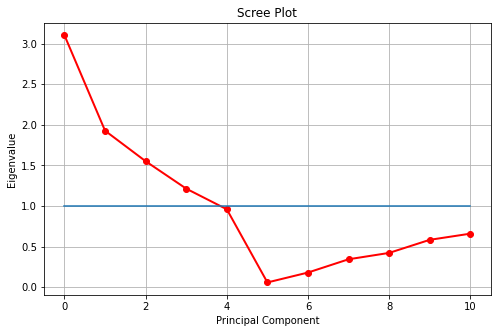

In [17]:
fig = plt.figure(figsize=(8,5))
sing_vals = range(wine.shape[1])
plt.plot(sing_vals, eig_vals, 'ro-', linewidth=2)
plt.plot(range(0,11),np.ones(11))
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

### Question 4: What is explained variances for each of 4 components while performing PCA?

In [18]:
pca = PCA(n_components=4)
X_pca= pca.fit_transform(X_std)
pca.explained_variance_

array([3.10107182, 1.92711489, 1.55151379, 1.21399175])

### Question 5: Which of the following is linear equation of third Principal component in terms of eigenvectors?

In [19]:
wine.columns

Index(['Tartaric Acid', 'Grape Density', 'Citric Acid', 'Residual.sugar',
       'Sodium chloride', 'Free.sulfur.dioxide', 'Bound.sulfur.dioxide',
       'Alcohol Density', 'PH Levels', 'Potassium chloride',
       'Alcohol Content'],
      dtype='object')

In [20]:
pca.components_[2]

array([-0.12330157, -0.44996253,  0.23824707,  0.10128338, -0.09261383,
        0.42879287,  0.3224145 , -0.33887135,  0.05769735,  0.27978615,
        0.47167322])

In [ ]:
print('The Linear eq of 3rd component: ')
for i in range(0,wine.shape[1]):
    print('{} * {}'.format(np.round(pca.components_[2][i],3),wine.columns[i]),end=' + ')